Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and University of Bristol ID:

In [1]:
NAME = "Emmie Bewley"
UoB_ID = "tp18016"

I like cats 



---

# Homework 2

In this homework, you will be working with functions.

## Question 1
The sine of a number can be represented by the following infinite series:
\begin{equation}
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!} \end{equation}
Your task will be to write a program to compute the sine using this series, but we will proceed in steps.

**Note of caution (just in case)**: There are hidden checks in this notebook that will return a grade 0 when testing your function if you just wrap the math sin(x) function.

### 1. Write a function that computes the factorial $(2n+1)!$
As a reminder, $(2n+1)! = (2n+1)(2n)(2n-1)\cdots 2 \cdot 1$.
As in the tutorial, you function needs to pass the following check: If you give it invalid input like a negative $n$, it needs to stop and return the phrase `Error: negative number!`.

In [2]:
# MANDATORY: Your function needs to be called factorial2(n)
# and return the value of the factorial

# YOUR CODE HERE
def factorial(n):
    a=1
    for i in range(1,n+1):
        a=a*i
    return a

def factorial2(n):
    if n<0:
        return "Error: negative number"
    else:
        c=factorial((2*n)+1)
        return c


In [3]:
assert factorial2(0) == 1
assert factorial2(1) == 6
assert factorial2(-1) == 'Error: negative number'

### 2. Now, using your factorial function, write a function for the sine series

In a first instance, limit your series to the first $N=10$ terms only (note: it's not a problem if it is the first 11 terms and similar off-by-one issues).
This result is of course not very accurate yet, and the graded test below takes this into account.

In [4]:
# MANDATORY: Your function needs to be calles sineseries1(x)
# and return the estimated value of sin(x) at x

# YOUR CODE HERE

def sineseries1(x):
    N=10
    total=0
    for i in range(0,N+1):
        total=total+((-1)**i)*x**(2*i+1)/factorial2(i)
    return total
sineseries1(0)

0.0

In [34]:
# Testing the series using the math sine function
from math import *

assert sineseries1(0) == 0
assert abs(sineseries1(pi/2) - sin(pi/2))<1e-10
# it does get progressively worse at convergence
assert abs(sineseries1(2*pi) - sin(2*pi))<1e-2


### 3. We can remedy this using a couple of interventions:
- Use a larger $N=50$. Note that for $N>50$ or so, the values of the factorial function will stop becoming accurate. Python is already kindly creating integers with more than $64$ bits on its own here.
- The convergence of this series slows down dramatically for larger absolute values of $x$ (and so does computational accuracy). Use the property $\sin(x + 2 m\pi) = \sin(x)$ for integer $m$ to reduce the absolute value of $x$.

In [35]:
# MANDATORY: Your function needs to be calles sineseries2(x)
# and return the estimated value of sin(x) at x

# YOUR CODE HERE
def mysine(x,N):
    total=0
    for i in range(0,N+1):
        total=total+((-1)**i)*x**(2*i+1)/factorial2(i)
    return total


def smaller(x):
    while x>2*pi:
        x=x-2*pi
    return x

def sineseries2(x):
    if x>2*pi:
        return mysine(smaller(x),50)
    else:
        return mysine(x,50)
    
        
        
    



In [36]:
# Testing the series again

assert sineseries2(0) == 0
assert abs(sineseries2(pi/2) - sin(pi/2))<1e-12
assert abs(sineseries2(2*pi) - sin(2*pi))<1e-12


In [37]:
# Additional tests your function should pass (including some hidden ones)
assert abs(sineseries2(5*pi) - sin(5*pi))<1e-12


## Question 2
We have spent some time writing root finding algorithms in one dimension. Here is a more realistic application of the methods we have seen. We would like to solve the polynomial equation
\begin{equation} x^4 -2 x^2 + \frac{1}{2}x + \frac{1}{4} = 0. \end{equation}
Use the bisection algorithm to find all the roots of this equation.

**To start with, here is a plot of the function:**

(-1.5, 2)

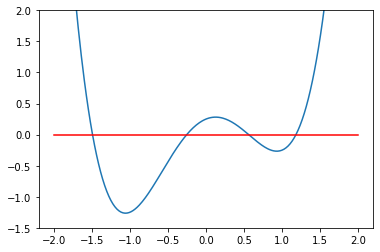

In [38]:
def polyfunc(x):
    return x**4 - 2*x**2 + 0.5*x +0.25

import numpy as np
import matplotlib.pyplot as plt

xval = np.linspace(-2,2,300)
yval = polyfunc(xval)
plt.figure()
plt.plot(xval,yval)
plt.plot(xval,0*xval,'r')
plt.ylim(-1.5,2)

### Step 1: Write a bisection root finding function for the polynomial above
Your function needs to take as arguments a bracket for the root, and a tolerance for the solution. Your function needs to give as result the value of the root if there is one, or the string `no root` if there is not one.

Please call your function `bisect_polynomial(a,b,tolerance)` so that the checks all work out.

In [39]:
# Your code here

# YOUR CODE HERE
def bisect_polynomial(a,b,tolerance):
    if polyfunc(a)*polyfunc(b)<0:
        if polyfunc(b)>0:
            e=abs(b-a)
            while e>tolerance:
                m=(b+a)/2
                if polyfunc(m)>0:
                    a,b=a,m
                    e=b-a
                else:
                    a,b=m,b
                    e=b-a
            return (b+a)/2
        else:                   #we have that f(b) is negative
            e=abs(b-a)
            while e>tolerance:
                m=(b+a)/2
                if polyfunc(m)<0:
                    a,b=a,m
                    e=b-a
                else:
                    a,b=m,b
                    e=b-a
            return (b+a)/2
    else:
        return "no root"

bisect_polynomial(0,1,1e-15)


0.5611034015776357

In [40]:
# First check if your function works, part of the test is hidden
assert bisect_polynomial(-2,-1.5,1e-10) == 'no root'
assert abs(bisect_polynomial(-2,-1,1e-4) + 1.49)<1e-2


### Step 2. Now find all roots of the equation
Please label them from smallest to largest as `root1`,`root2`, etc for the checks below to work correctly. Work to the best precision (smallest tolerance) that your code is able to, and **do not round the answers**.

In [45]:
# Please find the roots here.
root1=bisect_polynomial(-2,-1,1e-15)
root2=bisect_polynomial(-1,5,1e-15)
root3=bisect_polynomial(0,1,1e-15)
root4=bisect_polynomial(1,2,1e-15)
# YOUR CODE HERE



In [46]:
# we are testing root1 here, part of the test is hidden
assert abs(root1 + 1.49)<1e-2


In [47]:
# we are testing root2 here, part of the test is hidden
assert abs(root2 + 0.25)<1e-2


In [44]:
# There are more hidden tests here
